In [ ]:
http://drsherrirose.org/publications

### Autor: Ronisson Lucas Calmon da Conceição. Doutorando em Economia pela UFBA, linha de Economia Aplicada. Economista.

# Regressão Linear

* Objetivo: modelar a relação entre uma variável dependente (target) e uma variável independente, ou um conjunto de variáveis independentes.

## Regressão linear simples
* Uma variável target (y) e uma variável explicativa x (single feature).
* Assume-se a hipótese que as variável x e y seja linearmente relacionadas.
* Exemplos:
    * Consumo e Renda
    * Salário e anos de estudo
    * Vendas e gastos em propaganda

$$ Y = f(x_{i}) = \beta_{0}+\beta_{1}x_{i} $$

$$ Y_{i} = \beta_{0}+\beta_{1}x_{i}+\epsilon_{i} $$
$$ \epsilon_{i} = y_{i}-f(x_{i}) $$

$$ E(\epsilon_{i}) = 0$$

Podemos simplificar o processo álgebrico definindo variáveis centradas na média.

$$ y_{i}  = Y_{i} - \overline {Y_{i}} $$
$$ x_{i} = X_{i}- \overline{X} $$
$$ \overline{Y_{i}} = \alpha+\beta\overline{X} + 0 $$

$$ Y_{i} - \overline{Y} = (\alpha-\alpha)+\beta(X_{i}-\overline{X})+\epsilon_{i} $$

$$ y_{i} = \beta{x_{i}}+\epsilon_{i} $$

$$\epsilon_{i} = y_{i}-\beta x_{i} $$

Assim, a soma dos quadrados dos erros é denotada como:

$$\sum_{i=1}^{n}(\epsilon_{i})^{2} = \sum_{i=1}^{n}(y_{i}-\beta x_{i})^{2} $$

$$\sum_{i=1}^{n} (\epsilon_{i})^2 =  \sum_{i=1}^{n}(y_{i}-\beta x_{i})^2 $$

$$ \sum_{i=1}^{n} (\epsilon_{i})^2 = \sum_{i=1}^{n} (y_{i}^2-2\beta x_{i}y_{i} + \beta^2x_{i}^2) $$
$$ \sum_{i=1}^{n} (\epsilon_{i})^2 = \sum_{i=1}^{n} (y_{i}^2 + \beta^2x_{i}^2-2\beta x_{i}y_{i}) $$
$$ \sum_{i=1}^{n} (\epsilon_{i})^2 = \sum_{i=1}^{n}y_{i}^2+\sum_{i=1}^{n}\beta^2x_{i}^2-2\sum_{i=1}^{n}\beta x_{i}y_{i}$$

Sendo $\beta$ uma constante dentro do somatório temos que:

$$ \sum_{i=1}^{n} (\epsilon_{i})^2 = \sum_{i=1}^{n}y_{i}^2+\beta^2\sum_{i=1}^{n}x_{i}^2-2\beta\sum_{i=1}^{n}x_{i}y_{i}$$

O objetivo é minimizar a função acima, para tanto podemos derivar a expressão em relação $\beta$ e igualar a zero (condição de primeira ordem): 

$$\frac{\partial}{\partial\beta}\sum_{i=1}^{n} (\epsilon_{i})^2 = 0 $$

Usaremos a notação $\hat {\beta}$ (estimador) para $\beta$. Assim:

$$ 2 \hat{\beta} \sum_{i=1}^{n}x_{i}^2-2\sum_{i=1}^{n}x_{i}y_{i} = 0 $$
$$\hat{\beta} \sum_{i=1}^{n}x_{i}^2-\sum_{i=1}^{n}x_{i}y_{i} = 0  $$

Obtemos assim os estimadores:

$$ \hat{\beta} = \frac{\sum_{i=1}^{n}x_{i}y_{i}}{\sum_{i=1}^nx_{i}^2} $$
$$ \hat {\alpha} = \overline{Y} -\hat{\beta}\overline{X} $$

Podemos denotar:
$$ \hat{\beta} = \frac{S_{xy}}{S_{x}^2} $$

Em que:

$$ S_{xy} = \sum_{i=1}^{n} (x_{i}-\bar x) (y_{i}-\bar y) = \sum_{i=1}^{n} y_{i}x_{i}-n\bar{x}\bar{y}$$

$$ S_{x}^2 = \sum_{i=1}^{n} (x_{i}-\bar{x})^{2} = \sum_{i=1}^{n}x_{i}^2-n(\bar{x})^2 $$

### Código

In [202]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [173]:
dados = {'X':[103,123,145,126,189,211,178,155,141,156,166,179,197,204,125,112,107,135,144,188],
        'Y':[160,167,207,173,256,290,237,209,193,219,235,234,273,272,181,166,161,195,201,255]}

In [174]:
df = pd.DataFrame(dados)

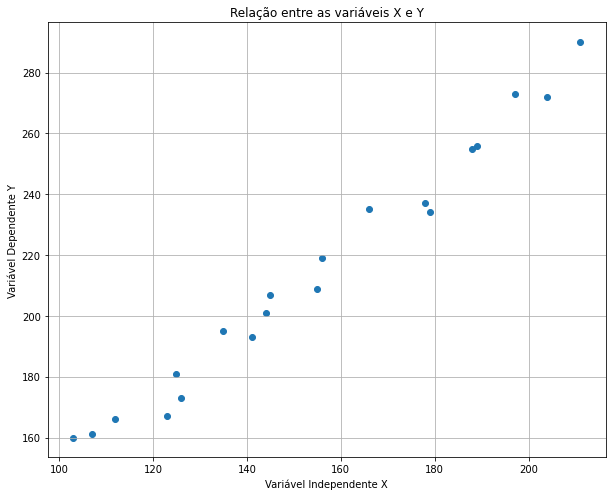

In [47]:
plt.figure(figsize=(10,8))
plt.title('Relação entre as variáveis X e Y')
plt.scatter(df['X'],df['Y'])
plt.xlabel('Variável Independente X')
plt.ylabel('Variável Dependente Y')
plt.grid(True)
plt.show()

In [13]:
df.sum()

X    3084
Y    4284
dtype: int64

In [14]:
df.mean()

X    154.2
Y    214.2
dtype: float64

Denotaremos:
$$ x = X_{i} - \overline{X} $$
$$ y = Y_{i} - \overline{Y} $$
$$ x^2 = (X_{i} - \overline{X})^2 $$
$$ y^2 = (Y_{i} - \overline{Y})^2 $$
$$ xy = (\sum_{i=1}^{n}(X_{i}-\overline{X})(Y_{i} - \overline{Y}) $$

In [176]:
df['x'] = df['X'] - df['X'].mean()
df['y'] = df['Y'] - df['Y'].mean()
df['x^2'] = (df['X'] - df['X'].mean())**2
df['y^2'] = (df['Y'] - df['Y'].mean())**2
df['xy'] = df['x']*df['y']

In [177]:
df

,X,Y,x,y,x^2,y^2,xy
0,103,160,-51.2,-54.2,2621.44,2937.64,2775.04
1,123,167,-31.2,-47.2,973.44,2227.84,1472.64
2,145,207,-9.2,-7.2,84.64,51.84,66.24
3,126,173,-28.2,-41.2,795.24,1697.44,1161.84
4,189,256,34.8,41.8,1211.04,1747.24,1454.64
5,211,290,56.8,75.8,3226.24,5745.64,4305.44
6,178,237,23.8,22.8,566.44,519.84,542.64
7,155,209,0.8,-5.2,0.64,27.04,-4.16
8,141,193,-13.2,-21.2,174.24,449.44,279.84
9,156,219,1.8,4.8,3.24,23.04,8.64


In [189]:
round(df['xy'].sum()/df['x^2'].sum(),3)

1.207

In [178]:
beta = round(df['xy'].sum() / df['x^2'].sum(), 3)

In [179]:
beta

1.207

In [60]:
alpha = round(df['Y'].mean() - beta*df['X'].mean(), 2)

In [61]:
alpha

28.08

$$ Y_{i} = 28,08+1,207X_{i} $$

Recuperação de parâmetros:

In [190]:
reta = [round(alpha+beta*x,2) for x in df['X']]

In [191]:
reta

[152.4,
 176.54,
 203.1,
 180.16,
 256.2,
 282.76,
 242.93,
 215.17,
 198.27,
 216.37,
 228.44,
 244.13,
 265.86,
 274.31,
 178.96,
 163.26,
 157.23,
 191.03,
 201.89,
 255.0]

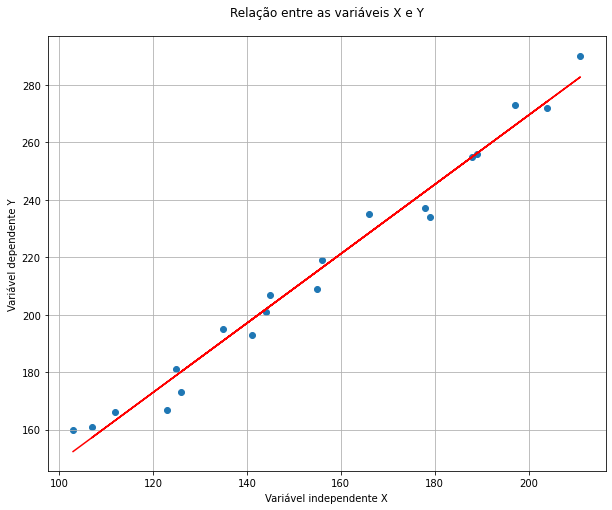

In [69]:
plt.figure(figsize = (10,8))
plt.scatter(df['X'], df['Y'])
plt.plot(df['X'], reta, color='r')
plt.title('Relação entre as variáveis X e Y', pad=20)
plt.xlabel('Variável independente X')
plt.ylabel('Variável dependente Y')
plt.grid(True)
plt.show()

In [70]:
df['Y-Y^'] = round(df['Y'] -reta,1)

In [76]:
df['(Y-Y^)^2'] = round((df['Y'] -reta)**2,1)

In [85]:
df['Y^'] = reta

In [86]:
df

,X,Y,x,y,x^2,y^2,xy,Y-Y^,(Y-Y^)^2,Y^
0,103,160,-51.2,-54.2,2621.44,2937.64,2775.04,7.6,57.8,152.40
1,123,167,-31.2,-47.2,973.44,2227.84,1472.64,-9.5,91.0,176.54
2,145,207,-9.2,-7.2,84.64,51.84,66.24,3.9,15.2,203.10
3,126,173,-28.2,-41.2,795.24,1697.44,1161.84,-7.2,51.3,180.16
4,189,256,34.8,41.8,1211.04,1747.24,1454.64,-0.2,0.0,256.20
5,211,290,56.8,75.8,3226.24,5745.64,4305.44,7.2,52.4,282.76
6,178,237,23.8,22.8,566.44,519.84,542.64,-5.9,35.2,242.93
7,155,209,0.8,-5.2,0.64,27.04,-4.16,-6.2,38.1,215.17
8,141,193,-13.2,-21.2,174.24,449.44,279.84,-5.3,27.8,198.27
9,156,219,1.8,4.8,3.24,23.04,8.64,2.6,6.9,216.37


In [78]:
df['(Y-Y^)^2'].sum()

620.0999999999999

In [79]:
df['(Y-Y^)^2'].mean()

31.004999999999995

In [74]:
abs(round(df['Y-Y^'].mean(),1))

0.0

In [75]:
abs(round(df['Y-Y^'].sum(),1))

0.1

In [82]:
SQT = df['y^2'].sum().round(2)

In [83]:
SQT

31513.2

In [88]:
SQE = sum((df['Y^'] - df['Y^'].mean())**2)

In [89]:
SQE

30884.645694999996

In [94]:
SQR = round(sum(df['(Y-Y^)^2']),2)

In [95]:
SQR

620.1

In [97]:
R2 = SQE/SQT

In [99]:
round(R2*100,2)

98.01

### OLS usando statsmodels

In [105]:
import statsmodels.api as sm

In [114]:
X = df['X']
X = sm.add_constant(X)
Y = df['Y']
resultados = sm.OLS(Y,X).fit()

In [115]:
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     896.8
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           8.27e-17
Time:                        12:47:57   Log-Likelihood:                -62.720
No. Observations:                  20   AIC:                             129.4
Df Residuals:                      18   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.0532      6.353      4.416      0.000      14.706      41.400
X              1.2072      0.040     29.946      0.000       1.122       1.292
==============================================================================
Omnibus:                        2.621   Durbin-Watson:                   2.683
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.430
Skew:                          -0.345   Prob(JB):                        0.489
Kurtosis:                       1.887   Cond. No.                         763.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Gerando dados para regressão usando sklearn

In [128]:
from sklearn.datasets import make_regression

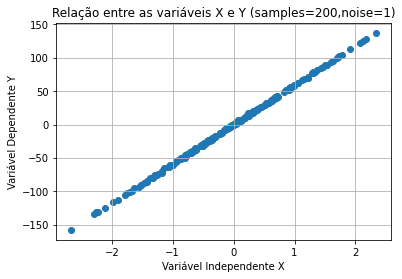

In [125]:
x, y = make_regression(n_samples=200, n_features=1,noise=1)
plt.scatter(x,y)
plt.title('Relação entre as variáveis X e Y (samples=200,noise=1)')
plt.xlabel('Variável Independente X')
plt.ylabel('Variável Dependente Y')
plt.grid(True)
plt.show()

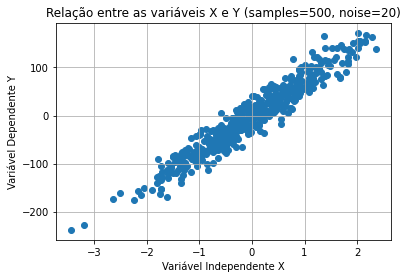

In [215]:
x, y = make_regression(n_samples=500, n_features=1,noise=20)
plt.scatter(x,y)
plt.title('Relação entre as variáveis X e Y (samples=500, noise=20)')
plt.xlabel('Variável Independente X')
plt.ylabel('Variável Dependente Y')
plt.grid(True)
plt.show()

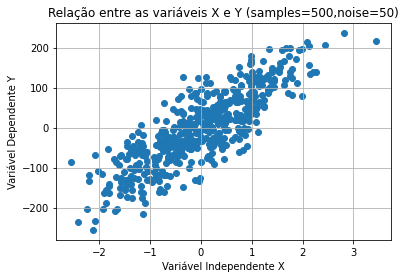

In [214]:
x, y = make_regression(n_samples=500, n_features=1,noise=50)
plt.scatter(x,y)
plt.title('Relação entre as variáveis X e Y (samples=500,noise=50)')
plt.xlabel('Variável Independente X')
plt.ylabel('Variável Dependente Y')
plt.grid(True)
plt.show()

# Regressão Linear Múltipla

$ y_{i} =  \beta_{0}+\beta_{1}x_{i1} +\beta_{2}x_{i2}+\beta_{3}x_{i3}+\ldots+\beta_{p}x_{ip}+ \epsilon_{i}$

Generalizando,em notação matricial temos que:

$$ \mathbf {y} = \mathbf {X}\beta+\mathbf \epsilon $$

Onde:

$$
\mathbf {y} = \left[
\begin{array}{c c c}
y_{1} \\
y_{2} \\
\vdots\\ 
y_{p}\\
\end{array}\right]
$$ 

$$
\mathbf {\mathbf{\beta}} = \left[
\begin{array}{c c c}
\beta_{0} \\
\beta_{1} \\
\vdots\\ 
\beta_{p}\\
\end{array}\right]
$$ 

$$
\mathbf {\epsilon} = \left[
\begin{array}{c c c}
\epsilon_{0} \\
\epsilon_{1} \\
\vdots\\ 
\epsilon_{p}\\
\end{array}\right]
$$ 

$$
\mathbf {X} = \left[
\begin{array}{c c c}
1 & x_{11}& \ldots& x_{1p}\\
1 & x_{21}& \ldots& x_{2n}\\
\vdots & \vdots & \ddots & \vdots\\ 
1 & x_{n1} &\ldots & x_{np}
\end{array}\right]
$$ 

Com um problema de otimização análogo ao anterior obtemos a partir de vetor de erros:

$$\mathbf{e'e} = (\mathbf{Y} - \mathbf{X\beta})'(\mathbf{Y} - \mathbf{X\beta}) $$
$$\mathbf{e'e} = \mathbf{Y'Y}-\mathbf{Y'X\beta}-\mathbf{\beta'X'Y}+\mathbf{\beta'X'X\beta} $$
$$\mathbf{e'e} = \mathbf{Y'Y}-\mathbf{2\beta'X'Y}+\mathbf{\beta'X'X\beta} $$
Derivando em relação a $\beta$ e igualando a zero:
$$-2\mathbf{X'Y}+2\mathbf{X'X\hat{\beta}} = 0 $$
$$ 2\mathbf{X'X\hat{\beta}} = 2\mathbf{X'Y} $$

Pré-multiplicando ambos os lados da equação por $(\mathbf{X'X})^{-1} $ :

$$ (\mathbf{X'X})^{-1}\mathbf{X'X\hat{\beta}} = (\mathbf{X'X})^{-1}\mathbf{X'Y} $$

$$\therefore \mathbf {\hat\beta} = (\mathbf {X^{'}}\mathbf {X})^{-1} \mathbf {X^{'}}y $$

Exemplo:

$$\ln (G/pop) = \beta_{1}+\beta_{2}\ln(income/pop)+\beta_{3}\ln (price_{G})+\beta_{4}\ln(P_{newcars})+\beta_{5}\ln(P_{usedcars})+\epsilon$$

### Estimando uma regressão múltipla

Modelo a ser estimado:
$$ Y = \beta_{1}+\beta_{2}X_{2}+\beta_{3}X_{3}+\epsilon_{i} $$

In [198]:
Y = {'Y':[800, 1160, 1580, 2010, 1890, 2600, 2070,1890,1830,1740,1380,1060]}
X = {1:np.ones(12),
     'X2':[2, 4, 6, 8,7,12,11,10,9,8,6,4],
    'X3':[0.8,0.7,0.5,0.4,0.2,0.2,0.8,0.7,0.6,0.1,0.5,0.4]}

In [199]:
Y = pd.DataFrame(Y)
X = pd.DataFrame(X).values

In [160]:
X

array([[ 1. ,  2. ,  0.8],
       [ 1. ,  4. ,  0.7],
       [ 1. ,  6. ,  0.5],
       [ 1. ,  8. ,  0.4],
       [ 1. ,  7. ,  0.2],
       [ 1. , 12. ,  0.2],
       [ 1. , 11. ,  0.8],
       [ 1. , 10. ,  0.7],
       [ 1. ,  9. ,  0.6],
       [ 1. ,  8. ,  0.1],
       [ 1. ,  6. ,  0.5],
       [ 1. ,  4. ,  0.4]])

In [165]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(Y))

In [168]:
beta.round(2)

array([[ 789.33],
       [ 149.56],
       [-419.26]])

Valor dos parâmetros:
$$\hat{\beta_{1}} = 789,33$$
$$\hat{\beta_{2}} = 149,56$$
$$\hat{\beta_{3}} = -419.26$$

Modelo estimado:

$$ \hat{Y} = 789,33+149,56X_{2}−419,26X_{3}$$

### OLS usando statsmodels

In [200]:
X = sm.add_constant(X)
resultados = sm.OLS(Y,X).fit()

In [206]:
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     66.82
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           3.98e-06
Time:                        20:54:47   Log-Likelihood:                -74.499
No. Observations:                  12   AIC:                             155.0
Df Residuals:                       9   BIC:                             156.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        789.3296    155.258      5.084      0.001     438.112    1140.547
x1           149.5593     14.225     10.514      0.000     117.381     181.738
x2          -419.2566    179.557     -2.335      0.044    -825.443     -13.070
==============================================================================
Omnibus:                        1.230   Durbin-Watson:                   0.438
Prob(Omnibus):                  0.541   Jarque-Bera (JB):                0.739
Skew:                          -0.122   Prob(JB):                        0.691
Kurtosis:                       1.809   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""